## 1.b Newton's Method 
We have provided two data files:

• http://cs229.stanford.edu/ps/ps1/logistic_x.txt

• http://cs229.stanford.edu/ps/ps1/logistic_y.txt

These files contain the inputs ($x^{(i)} ∈ R^2$) and outputs ($y^{(i)} ∈ \{−1,1\}$), respectively for a
binary classification problem, with one training example per row. Implement Newton’s method for optimizing $J(θ)$, and apply it to fit a logistic regression model to the data.
Initialize Newton’s method with $θ = \vec{0}$ (the vector of all zeros). What are the coefficients $θ$ resulting from your fit? (Remember to include the intercept term.)

In [50]:
import sys
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
!head data/logistic_x.txt

   1.3432504e+00  -1.3311479e+00
   1.8205529e+00  -6.3466810e-01
   9.8632067e-01  -1.8885762e+00
   1.9443734e+00  -1.6354520e+00
   9.7673352e-01  -1.3533151e+00
   1.9458584e+00  -2.0443278e+00
   2.1075153e+00  -2.1256684e+00
   2.0703730e+00  -2.4634101e+00
   8.6864964e-01  -2.4119348e+00
   1.8006594e+00  -2.7739689e+00


In [27]:
!head data/logistic_y.txt

   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00


In [28]:
# Reading input and label

features = np.genfromtxt('data/logistic_x.txt', delimiter='', dtype='float')
label = np.genfromtxt('data/logistic_y.txt', delimiter='', dtype='float')

features = np.insert(features, 0, values=1, axis=1)
label = np.reshape(label, (label.shape[0], 1))

In [29]:
print(features.shape)
print(label.shape)


(99, 3)
(99, 1)


In [37]:
def get_hypothesis(theta, features, y):
    #theta : N*1, features : M X N
    x_theta = np.matmul(features, theta)
    y_x = np.multiply(y, x_theta)
    h_x = 1/(1+ np.exp(-y_x))
    return h_x #M*1

                  
def get_loss(y, features, theta, eps=1e-10):
    #h_x : M*1, y: M*1
    x_theta = np.matmul(features, theta)
    y_x = np.multiply(y, x_theta)
    loss = np.log(1 + (np.exp(-y_x)))
    loss = np.mean(loss)
    return loss
             

def get_gradient(y, h_x, features):
    '''
        y = M X 1
        h_x = M X 1
        features = M X N
        gradient = N X 1
    '''

    prediction = h_x - 1  #[M*1]
    prediction = np.multiply(prediction, y)
    gradient = np.matmul(np.transpose(prediction), features) #[1XN]
    return np.transpose(gradient) # N*1


def get_hessian(features, h_x):
    # features = M X N, h_x = M X 1
    M = features.shape[0]
    diagonal_matrix = np.zeros((M , M))
    diagonal_values = np.multiply(h_x, (1-h_x)) # M * 1
    np.fill_diagonal(diagonal_matrix, diagonal_values) 
    hessian = np.matmul(np.transpose(features), diagonal_matrix) # [N*M] * [M*M] = N*M
    hessian = np.matmul(hessian, features) # [N*M] * [M*N] = [N*N]
    return hessian



In [51]:
old_theta = None
eps = 1e-4
theta = np.zeros((np.shape(features)[1],1)) #N*1 : 3*1
count = 0
while True:
    h_x = get_hypothesis(theta, features, label) #M*1
    gradient = get_gradient(label, h_x, features) #N*1
    hessian = get_hessian(features, h_x) + eps #N*N
    theta = theta - np.matmul(np.linalg.inv(hessian), gradient) # N*1 = N*1 - [(N*N)*(N*1)]
    h_x = get_hypothesis(theta, features, label) #M*1
    loss = get_loss(label, features, theta)
    if old_theta is not None and np.sum(np.abs(theta - old_theta))<eps:
        break
    old_theta = theta
print("Final set of coefficients : ", theta)

Final set of coefficients :  [[-2.6205116 ]
 [ 0.76037154]
 [ 1.17194674]]


0.57079941 7.7054006
-4.0065037 3.8128655
[0.57079941 1.36353288 2.15626634 2.94899981 3.74173327 4.53446674
 5.3272002  6.11993367 6.91266713 7.7054006 ]
[-4.0065037 -3.1376849 -2.2688661 -1.4000473 -0.5312285  0.3375903
  1.2064091  2.0752279  2.9440467  3.8128655]


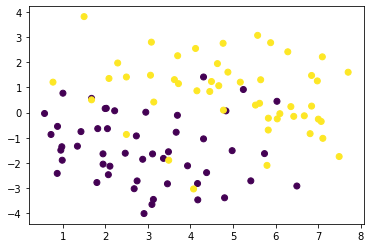

In [71]:
#Plotting the line of coefficients:

# Fixing random state for reproducibility
np.random.seed(19680801)

print(min(x),max(x))
print(min(y), max(y))
line_x = np.linspace(min(x), max(x), num=10)
line_y = np.linspace(min(y), max(y), num=10)


x = features[:,1]
y = features[:,2]
line = theta[0] + theta[1]*x 
plt.scatter(x,y,c=label[:,0].tolist())
#plt.plot(line)
plt.show()

In [72]:
line = theta[0]+theta[1]*line_x+theta[2]*line_y

In [73]:
line

array([-6.88190093, -5.2609196 , -3.63993828, -2.01895696, -0.39797563,
        1.22300569,  2.84398702,  4.46496834,  6.08594967,  7.70693099])